## Comparing the clean and incremental build time of a system on its different configurations

In [1]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,9.30,2736120,9.77,9.12,8.64
1,00002,10.04,2468160,9.33,8.68,8.21
2,00003,12.39,3202648,13.21,12.44,11.70
3,00004,12.56,3344192,12.80,12.10,11.56
4,00005,13.23,3456200,13.47,12.75,12.19
5,00006,12.04,3015768,11.89,10.71,10.22
6,00007,11.25,2857160,11.56,10.43,9.75
7,00008,11.12,2902288,11.23,10.55,9.91
8,00009,13.27,3218472,13.53,12.53,11.57
9,00010,11.80,3023648,13.44,11.57,10.85


In [2]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
1,00002,10.04,8.21,18.16
19,00020,12.88,10.91,15.33
5,00006,12.04,10.22,15.10
10,00011,11.42,9.74,14.68
18,00019,13.76,11.84,13.95
12,00013,11.82,10.20,13.65
6,00007,11.25,9.75,13.33
16,00017,8.81,7.64,13.28
8,00009,13.27,11.57,12.81
14,00015,11.94,10.45,12.42


In [3]:
# Extracting only the first and last 5 extreme differences in build time
df5 = df4[: 5]
df6 = df4[-5:]
df7 = df5.append(df6)
df7

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
1,00002,10.04,8.21,18.16
19,00020,12.88,10.91,15.33
5,00006,12.04,10.22,15.10
10,00011,11.42,9.74,14.68
18,00019,13.76,11.84,13.95
4,00005,13.23,12.19,7.85
11,00012,10.02,9.24,7.83
0,00001,9.30,8.64,7.16
13,00014,9.72,9.11,6.35
2,00003,12.39,11.70,5.56


<AxesSubplot:xlabel='Configurations', ylabel='Diff. of build time [%]'>

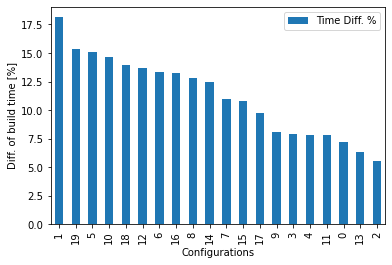

In [4]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = df4[["Branch", "Time Diff. %"]].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Diff. of build time [%]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot